In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path: str = "../../data/raw"
tmp_train_df = pd.read_csv(os.path.join(data_path,"train.csv"))
tmp_test_df = pd.read_csv(os.path.join(data_path,"test.csv"))
subway_info = pd.read_csv(os.path.join(data_path,"subwayInfo.csv"))
tmp_train_df["_type"] = "train"
tmp_test_df["_type"] = "test"
concat_df = pd.concat([tmp_train_df, tmp_test_df], axis=0)

In [3]:
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
print(sys.path[-1])

from src.pre_process.feature_add import FeatureAddition
from src.pre_process.feature_duplicate import FeatureDuplication
tmp_df = FeatureAddition(concat_df).get_data()
tmp_df = FeatureDuplication(tmp_df).get_data()


/Users/jejunlee/myproject/boostcamp/level2-competitiveds-recsys-06


In [4]:
print(concat_df.shape)
print(tmp_df.shape)

(1951400, 16)
(1860403, 15)


In [5]:
train_df = tmp_df[tmp_df["_type"] == "train"]
test_df = tmp_df[tmp_df["_type"] == "test"]
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1717611 entries, 0 to 1801227
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   area_m2              float64
 1   contract_year_month  int64  
 2   contract_day         int64  
 3   contract_type        int64  
 4   floor                int64  
 5   built_year           int64  
 6   latitude             float64
 7   longitude            float64
 8   age                  int64  
 9   deposit              float64
 10  _type                object 
 11  apt_idx              int64  
 12  area                 float64
 13  area_price           float64
 14  area_m2_price        float64
dtypes: float64(7), int64(7), object(1)
memory usage: 209.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 142792 entries, 0 to 150171
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   area_m2              142792 non-

# 정리할 것

In [27]:
print(tmp_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1860403 entries, 0 to 150171
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   area_m2              float64
 1   contract_year_month  int64  
 2   contract_day         int64  
 3   contract_type        int64  
 4   floor                int64  
 5   built_year           int64  
 6   latitude             float64
 7   longitude            float64
 8   age                  int64  
 9   deposit              float64
 10  _type                object 
 11  apt_idx              int64  
 12  area                 float64
 13  area_price           float64
 14  area_m2_price        float64
dtypes: float64(7), int64(7), object(1)
memory usage: 227.1+ MB
None


In [28]:
monthly_trade_volume = tmp_df.groupby(['apt_idx', 'area_m2', 'contract_year_month']).size().reset_index(name='monthly_trade_volume')

monthly_trade_volume['cumulative_trade_volume'] = monthly_trade_volume.groupby(['apt_idx', 'area_m2'])['monthly_trade_volume'].cumsum()

monthly_trade_volume.head(50)

,apt_idx,area_m2,contract_year_month,monthly_trade_volume,cumulative_trade_volume
0,0,71.3755,202002,1,1
1,0,71.3755,202007,2,3
2,0,71.3755,202011,1,4
3,0,71.3755,202012,1,5
4,0,71.3755,202103,2,7
5,0,71.3755,202104,3,10
6,0,71.3755,202105,3,13
7,0,71.3755,202106,6,19
8,0,71.3755,202107,2,21
9,0,71.3755,202108,5,26


In [42]:
monthly_trade_volume.to_csv('cumulative_trade_volume.csv', index=False)

In [29]:
tmp_df = tmp_df.merge(monthly_trade_volume, on=['apt_idx', 'area_m2', 'contract_year_month'], how='left')

tmp_df.head(50)

,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,monthly_trade_volume,cumulative_trade_volume
0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0,train,0,25.8,658.914729,200.004471,1,1
1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284,2,3
2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284,2,3
3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0,train,1,18.0,277.777778,84.260195,1,1
4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0,train,2,18.1,99.447514,30.095302,1,1
5,84.9342,201904,26,2,13,2016,36.965423,127.048779,3,20000.0,train,3,25.7,778.210117,235.476404,1,1
6,39.2700,201905,7,2,3,1990,36.957089,127.047449,29,4000.0,train,4,11.9,336.134454,101.858925,1,1
7,84.9342,201905,9,2,3,2016,36.965423,127.048779,3,20000.0,train,3,25.7,778.210117,235.476404,1,2
8,84.9610,201905,25,2,3,2016,36.965423,127.048779,3,20500.0,train,3,25.7,797.665370,241.287179,1,1
9,84.9182,201905,25,2,13,2016,36.965423,127.048779,3,19000.0,train,3,25.7,739.299611,223.744733,1,1


In [30]:
tmp_df[tmp_df['apt_idx'] == 0].head()

,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,monthly_trade_volume,cumulative_trade_volume
0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0,train,0,25.8,658.914729,200.004471,1,1
1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284,2,3
2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284,2,3
29146,71.3755,202002,8,2,18,2019,37.054314,127.045216,1,20000.0,train,0,21.6,925.925926,280.208195,1,1
29184,110.6845,202003,7,2,16,2019,37.054314,127.045216,1,30000.0,train,0,33.5,895.522388,271.040661,1,1


In [31]:
tmp_df[(tmp_df['apt_idx'] == 0) & (tmp_df['area_m2'] == 71.3755)]

,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,monthly_trade_volume,cumulative_trade_volume
29146,71.3755,202002,8,2,18,2019,37.054314,127.045216,1,20000.0,train,0,21.6,925.925926,280.208195,1,1
186353,71.3755,202007,8,2,8,2019,37.054314,127.045216,1,26000.0,train,0,21.6,1203.703704,364.270653,2,3
186355,71.3755,202007,16,2,20,2019,37.054314,127.045216,1,31500.0,train,0,21.6,1458.333333,441.327907,2,3
186359,71.3755,202011,2,2,2,2019,37.054314,127.045216,1,40000.0,train,0,21.6,1851.851852,560.416389,1,4
186361,71.3755,202012,13,2,25,2019,37.054314,127.045216,1,35000.0,train,0,21.6,1620.370370,490.364341,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791065,71.3755,202401,13,2,21,2019,37.054314,127.045216,5,NaN,test,0,21.6,NaN,NaN,3,87
1791066,71.3755,202401,13,0,21,2019,37.054314,127.045216,5,NaN,test,0,21.6,NaN,NaN,3,87
1791067,71.3755,202401,14,1,1,2019,37.054314,127.045216,5,NaN,test,0,21.6,NaN,NaN,3,87
1791070,71.3755,202402,5,0,8,2019,37.054314,127.045216,5,NaN,test,0,21.6,NaN,NaN,1,88


In [32]:
tmp_df.drop(columns='_type').corr()

,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,apt_idx,area,area_price,area_m2_price,monthly_trade_volume,cumulative_trade_volume
area_m2,1.000000,-0.010721,0.004590,0.010327,0.103958,0.084883,-0.004011,0.028936,-0.086439,0.522559,-0.006488,0.999992,-0.008946,-0.009149,-0.102325,-0.129341
contract_year_month,-0.010721,1.000000,-0.035726,-0.652621,0.020020,0.074378,-0.018269,0.005846,0.059337,0.072127,0.008251,-0.010701,0.093001,0.093010,0.036988,0.337630
contract_day,0.004590,-0.035726,1.000000,0.025627,-0.002350,0.000027,0.006078,0.004893,-0.004808,0.007482,0.009182,0.004586,0.005196,0.005195,0.012600,-0.016791
contract_type,0.010327,-0.652621,0.025627,1.000000,-0.018989,-0.071791,0.015732,0.003339,-0.015036,-0.084579,-0.024833,0.010329,-0.109219,-0.109227,-0.012284,-0.172027
floor,0.103958,0.020020,-0.002350,-0.018989,1.000000,0.289706,-0.031593,-0.036848,-0.287332,0.132750,0.006216,0.104024,0.101871,0.101887,0.071469,0.047225
built_year,0.084883,0.074378,0.000027,-0.071791,0.289706,1.000000,-0.079028,0.011936,-0.991055,0.145462,-0.024959,0.085019,0.184204,0.184264,0.129033,-0.075581
latitude,-0.004011,-0.018269,0.006078,0.015732,-0.031593,-0.079028,1.000000,-0.150221,0.076669,0.075976,0.215277,-0.004096,0.109817,0.109782,-0.035187,-0.035803
longitude,0.028936,0.005846,0.004893,0.003339,-0.036848,0.011936,-0.150221,1.000000,-0.011179,0.157859,-0.359049,0.028969,0.179006,0.178988,0.065670,0.059262
age,-0.086439,0.059337,-0.004808,-0.015036,-0.287332,-0.991055,0.076669,-0.011179,1.000000,-0.137116,0.026074,-0.086572,-0.173386,-0.173445,-0.124201,0.120641
deposit,0.522559,0.072127,0.007482,-0.084579,0.132750,0.145462,0.075976,0.157859,-0.137116,1.000000,0.222426,0.522586,0.784040,0.783901,-0.051539,-0.022488


In [33]:
tmp_df['contract_year_month'] = pd.to_datetime(tmp_df['contract_year_month'], format='%Y%m')

In [34]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860403 entries, 0 to 1860402
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   area_m2                  float64       
 1   contract_year_month      datetime64[ns]
 2   contract_day             int64         
 3   contract_type            int64         
 4   floor                    int64         
 5   built_year               int64         
 6   latitude                 float64       
 7   longitude                float64       
 8   age                      int64         
 9   deposit                  float64       
 10  _type                    object        
 11  apt_idx                  int64         
 12  area                     float64       
 13  area_price               float64       
 14  area_m2_price            float64       
 15  monthly_trade_volume     int64         
 16  cumulative_trade_volume  int64         
dtypes: datetime64[ns](1), float

In [35]:
tmp_df.groupby(['apt_idx', 'area_m2', 'contract_year_month']).size()

apt_idx  area_m2  contract_year_month
0        71.3755  2020-02-01             1
                  2020-07-01             2
                  2020-11-01             1
                  2020-12-01             1
                  2021-03-01             2
                                        ..
18671    79.4000  2024-01-01             1
18672    64.1000  2024-01-01             1
18673    75.6200  2024-01-01             1
18674    49.9000  2024-03-01             1
18675    84.9400  2024-02-01             1
Length: 873186, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

# apt_idx와 area_m2별로 그룹화하여 데이터 처리
grouped = tmp_df.groupby(['apt_idx', 'area_m2'])

# 각 그룹(apt_idx, area_m2)에 대해 그래프 그리기
for (apt_idx, area_m2), group_data in grouped:
    # contract_year_month 기준으로 정렬
    group_data = group_data.sort_values(by='contract_year_month')

    # 그래프 생성
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 첫 번째 y축: cumulative_trade_volume
    ax1.plot(group_data['contract_year_month'], group_data['cumulative_trade_volume'], color='green', label='Cumulative Trade Volume', marker='o')
    ax1.set_xlabel('Contract Year Month')
    ax1.set_ylabel('Cumulative Trade Volume', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # 두 번째 y축: deposit
    ax2 = ax1.twinx()
    ax2.plot(group_data['contract_year_month'], group_data['deposit'], color='blue', label='Deposit', marker='x')
    ax2.set_ylabel('Deposit', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # 제목 및 레전드 추가
    plt.title(f'Apt_idx: {apt_idx}, Area: {area_m2} m²')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 레이아웃 최적화
    fig.tight_layout()

    # 그래프 출력
    plt.show()


In [41]:
tmp_df[(tmp_df['apt_idx'] == 4) & (tmp_df['area_m2'] == 39.27)]

,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,monthly_trade_volume,cumulative_trade_volume
6,39.27,2019-05-01,7,2,3,1990,36.957089,127.047449,29,4000.0,train,4,11.9,336.134454,101.858925,1,1
21,39.27,2019-10-01,26,2,5,1990,36.957089,127.047449,29,3000.0,train,4,11.9,252.100840,76.394194,1,2
35,39.27,2020-02-01,6,2,4,1990,36.957089,127.047449,30,4000.0,train,4,11.9,336.134454,101.858925,1,3
154302,39.27,2020-05-01,31,2,1,1990,36.957089,127.047449,30,3500.0,train,4,11.9,294.117647,89.126560,1,4
154305,39.27,2020-11-01,25,2,1,1990,36.957089,127.047449,30,2500.0,train,4,11.9,210.084034,63.661828,1,5
154306,39.27,2020-12-01,3,2,5,1990,36.957089,127.047449,30,4000.0,train,4,11.9,336.134454,101.858925,5,10
154307,39.27,2020-12-01,3,2,4,1990,36.957089,127.047449,30,3000.0,train,4,11.9,252.100840,76.394194,5,10
154308,39.27,2020-12-01,11,2,5,1990,36.957089,127.047449,30,4000.0,train,4,11.9,336.134454,101.858925,5,10
154309,39.27,2020-12-01,16,2,4,1990,36.957089,127.047449,30,4000.0,train,4,11.9,336.134454,101.858925,5,10
154311,39.27,2020-12-01,22,2,1,1990,36.957089,127.047449,30,4500.0,train,4,11.9,378.151261,114.591291,5,10


# New EDA

## train 데이터와 test 데이터 분포 확인

### 위치 정보 기반 탐구

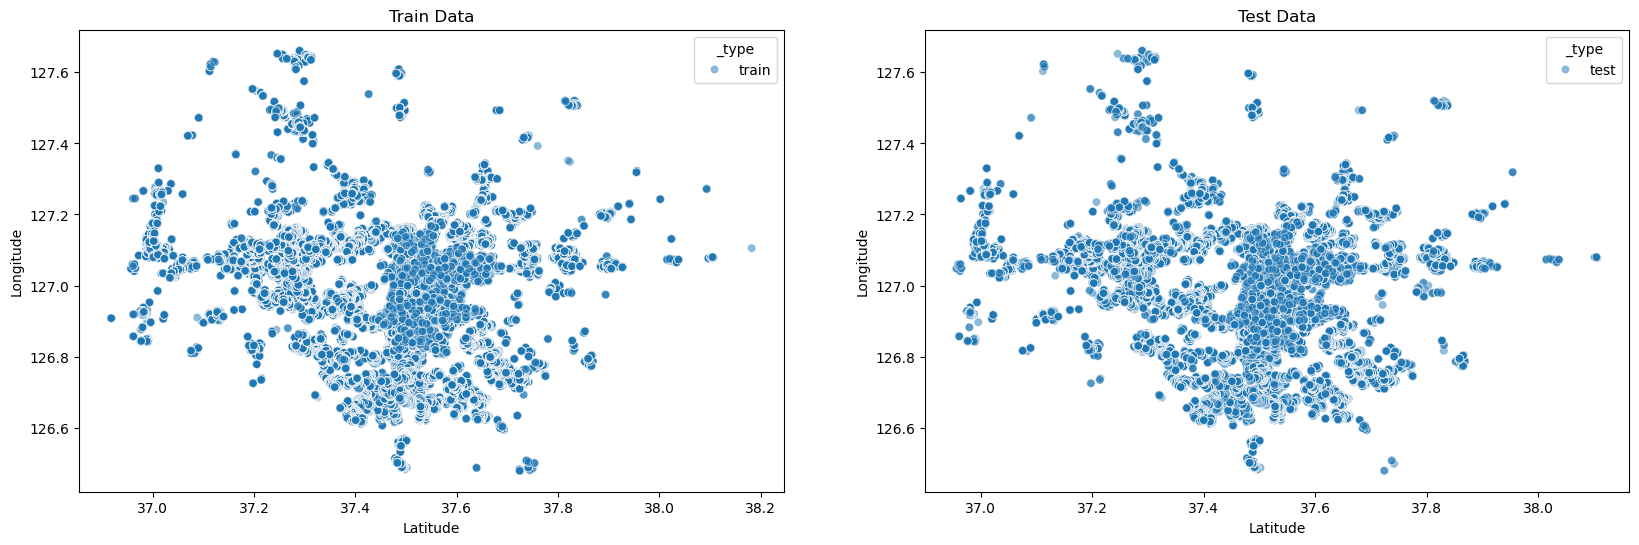

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=train_df, 
                x='latitude', y='longitude', hue='_type', alpha=0.5, ax=axes[0])
axes[0].set_title('Train Data')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Longitude')

sns.scatterplot(data=test_df,
                x='latitude', y='longitude', hue='_type', alpha=0.5, ax=axes[1])
axes[1].set_title('Test Data')
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Longitude')

plt.show()

In [7]:
print('train data shape: ', train_df.shape)
print('test data shape: ', test_df.shape)

train data shape:  (1717611, 15)
test data shape:  (142792, 15)


In [20]:
# test와 train 데이터의 위도, 경도가 일치하는 경우와 일치하지 않는 경우 확인을 위한 merge
merged_df = test_df.merge(train_df[['latitude', 'longitude']], on=['latitude', 'longitude'], how='left', indicator=True)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61204719 entries, 0 to 61204718
Data columns (total 16 columns):
 #   Column               Dtype   
---  ------               -----   
 0   area_m2              float64 
 1   contract_year_month  int64   
 2   contract_day         int64   
 3   contract_type        int64   
 4   floor                int64   
 5   built_year           int64   
 6   latitude             float64 
 7   longitude            float64 
 8   age                  int64   
 9   deposit              float64 
 10  _type                object  
 11  apt_idx              int64   
 12  area                 float64 
 13  area_price           float64 
 14  area_m2_price        float64 
 15  _merge               category
dtypes: category(1), float64(7), int64(7), object(1)
memory usage: 6.9+ GB


In [15]:
same_lat_lon_df = merged_df[merged_df['_merge'] == 'both']
diff_lat_lon_df = merged_df[merged_df['_merge'] == 'left_only']

print('test에서 train의 샘플과 중복된 장소의 개수: ', len(same_lat_lon_df))
print('test에서 train의 샘플과 중복되지 않은 장소의 개수: ', len(diff_lat_lon_df))

test에서 train의 샘플과 중복된 장소의 개수:  61203157
test에서 train의 샘플과 중복되지 않은 장소의 개수:  1562


In [12]:
same_lat_lon_df = test_df[test_df[['latitude', 'longitude'].isin(train_df[['latitude', 'longitude']])]]
different_lat_lon_df = test_df[~test_df[['latitude', 'longitude'].isin(train_df[['latitude', 'longitude']])]]

print('test에서 train의 샘플과 중복된 장소의 개수: ', len(same_lat_lon_df))
print('test에서 train의 샘플과 중복되지 않은 장소의 개수: ', len(different_lat_lon_df))

AttributeError: 'list' object has no attribute 'isin'

In [10]:
different_lat_lon_df[different_lat_lon_df['_type'] == 'test'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 5655 to 145311
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_m2              78 non-null     float64
 1   contract_year_month  78 non-null     int64  
 2   contract_day         78 non-null     int64  
 3   contract_type        78 non-null     int64  
 4   floor                78 non-null     int64  
 5   built_year           78 non-null     int64  
 6   latitude             78 non-null     float64
 7   longitude            78 non-null     float64
 8   age                  78 non-null     int64  
 9   deposit              0 non-null      float64
 10  _type                78 non-null     object 
 11  apt_idx              78 non-null     int64  
 12  area                 78 non-null     float64
 13  area_price           0 non-null      float64
 14  area_m2_price        0 non-null      float64
dtypes: float64(7), int64(7), object(1)
memor

- different_lat_lon_df를 _type에 따라 스캐터플롯 시각화
- test 데이터와 

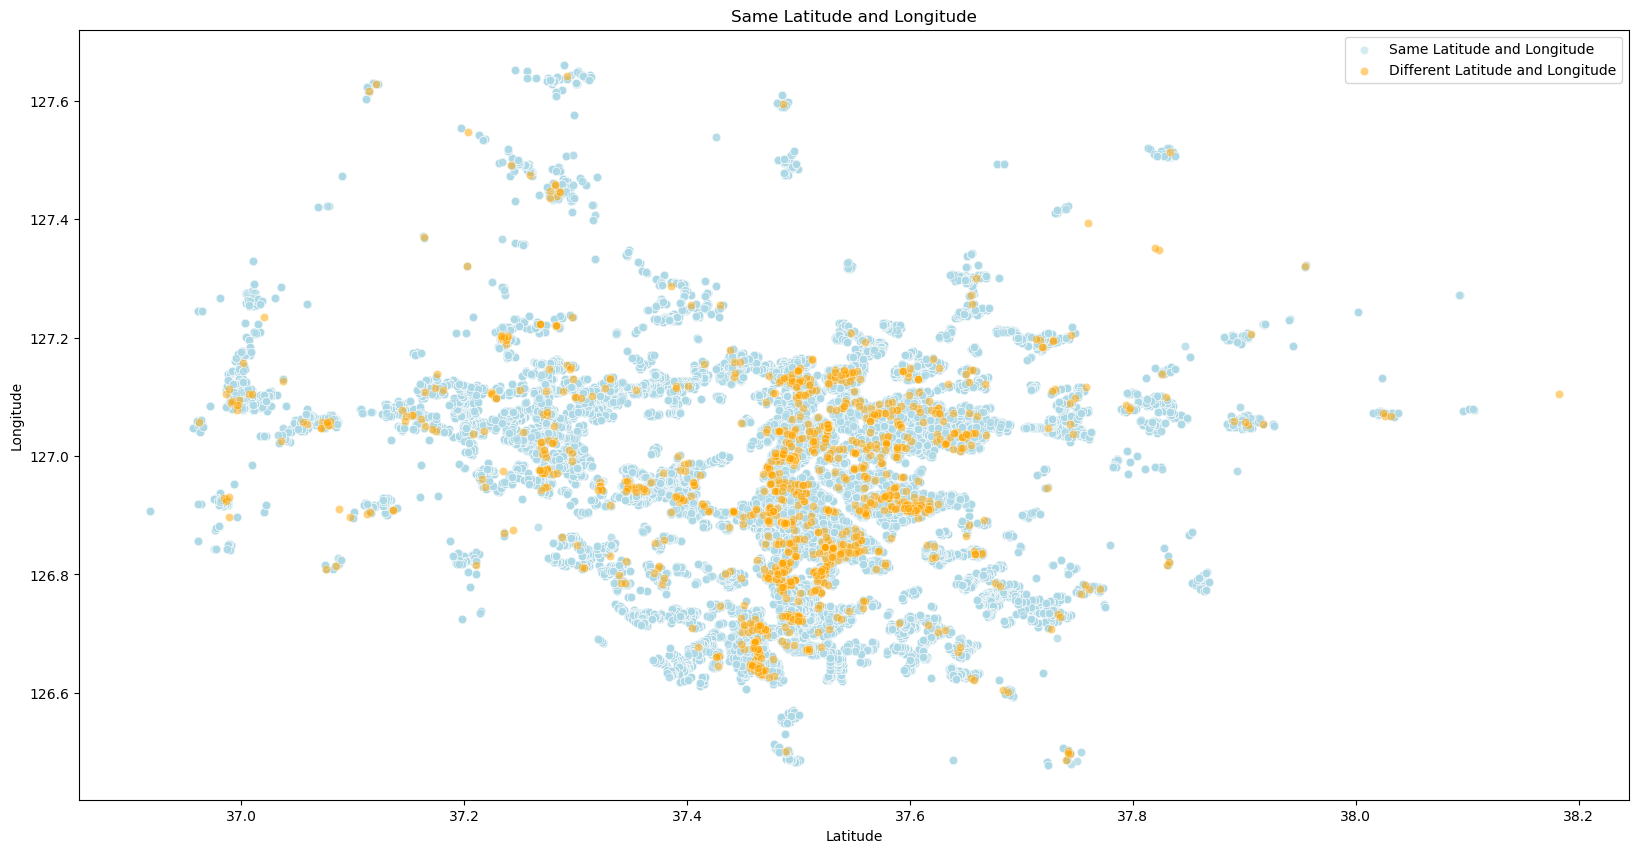

In [16]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=same_lat_lon_df, x='latitude', y='longitude', alpha=0.5, color='lightblue', label='Same Latitude and Longitude')
sns.scatterplot(data=different_lat_lon_df, x='latitude', y='longitude', alpha=0.5, color='orange', label='Different Latitude and Longitude')
plt.title('Same Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

- test에는 train에 포함되지 않은 데이터가 존재하나, 육안상으로는 근접해있는 데이터가 존재할 것으로 추정.
- 우선 test 데이터에서 가장 가까운 train 데이터를 뽑아보고, 샘플들 간의 간격 피처 생성한 후, 근처 데이터를 추산할 거리를 살펴볼 것임

In [34]:
from scipy.spatial import cKDTree
import numpy as np

# haversine 공식을 이용한 거리 계산 함수 (단위: km)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0

    # 라디안으로 변환
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

def add_nearest_place_and_distance_feature(train_df: pd.DataFrame, test_df: pd.DataFrame) -> pd.DataFrame:
    """
    train_df와 test_df에서 위도, 경도 정보를 기반으로 가장 가까운 train_df의 장소를 찾아
    test_df에 nearest_place 피처와 두 위치 사이의 거리를 추가하는 함수
    """
    
    # train_df와 test_df에서 위도, 경도 좌표 추출
    train_coords = train_df[['latitude', 'longitude']].values
    test_coords = test_df[['latitude', 'longitude']].values

    # cKDTree 알고리즘으로 train_df의 좌표에 대해 KD-트리 생성
    tree = cKDTree(train_coords)

    # test_df의 각 좌표에 대해 가장 가까운 train_df의 좌표 인덱스와 거리 찾기
    distances, indices = tree.query(test_coords, k=1)   # k=1: 가장 가까운 1개의 인덱스와 거리 반환

    # nearest_place 피처로 train_df의 인덱스 추가
    test_df['nearest_place'] = indices

    # 각 test 데이터에 대해 가장 가까운 train 좌표와의 거리를 계산 (haversine 사용)
    test_df['nearest_distance'] = [
        haversine(test_lat, test_lon, train_coords[idx][0], train_coords[idx][1])
        for test_lat, test_lon, idx in zip(test_df['latitude'], test_df['longitude'], indices)
    ]

    return test_df

tmp_test_df = add_nearest_place_and_distance_feature(tmp_train_df, tmp_test_df)

In [35]:
print(max(tmp_test_df['nearest_distance']))
print(tmp_test_df[tmp_test_df['nearest_distance'] == max(tmp_test_df['nearest_distance'])])

0.893583091495749
      index   area_m2  contract_year_month  contract_day  contract_type  \
2725   2725   67.5283               202404            22              0   
2753   2753   84.9892               202405            11              0   
2758   2758   84.9892               202405            15              0   
2776   2776   61.1536               202406             6              0   
2785   2785  101.9972               202406            17              0   
2787   2787  101.9972               202406            18              0   

      floor  built_year   latitude   longitude  age _type  nearest_place  \
2725      3        2024  37.101009  126.905443    0  test         175494   
2753     23        2024  37.101009  126.905443    0  test         175494   
2758      7        2024  37.101009  126.905443    0  test         175494   
2776      1        2024  37.101009  126.905443    0  test         175494   
2785      7        2024  37.101009  126.905443    0  test         175494   


- 직선거리상 tmp_test_df의 샘플들과 가장 가까운 train 샘플들 중, 최대 거리는 1km 이내

/Users/jejunlee/miniconda3/envs/boostcamp/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


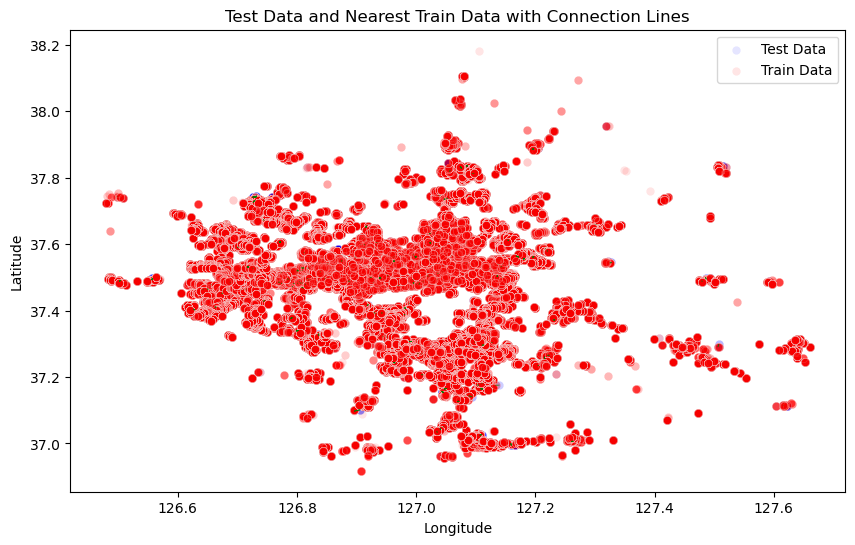

In [46]:
# tmp_train_df의 위도 경도 좌표 추출
train_coords = tmp_train_df[['latitude', 'longitude']].values

# tmp_test_df에 대한 위도 경도 좌표 추출 및 nearest_place 기반으로 tmp_train_df 좌표 찾기
tmp_test_df = add_nearest_place_and_distance_feature(tmp_train_df, tmp_test_df)

# tmp_test_df의 위도 경도 좌표와 nearest_place에 해당하는 tmp_train_df의 좌표 추출
test_coords = tmp_test_df[['latitude', 'longitude']].values
nearest_train_coords = tmp_train_df.iloc[tmp_test_df['nearest_place']][['latitude', 'longitude']].values

# 그래프 그리기
plt.figure(figsize=(10, 6))

# tmp_test_df의 위도, 경도 (파란색)
sns.scatterplot(x=tmp_test_df['longitude'], y=tmp_test_df['latitude'], alpha=0.1, color='blue', label='Test Data')

# tmp_train_df의 위도, 경도 (빨간색)
sns.scatterplot(x=tmp_train_df['longitude'], y=tmp_train_df['latitude'], alpha=0.1, color='red', label='Train Data')

# tmp_test_df의 각 데이터와 가장 가까운 tmp_train_df의 좌표 연결 (초록색 선)
for i in range(len(test_coords)):
    plt.plot([test_coords[i][1], nearest_train_coords[i][1]], [test_coords[i][0], nearest_train_coords[i][0]], 
             color='green', linewidth=0.5, alpha=0.5)

# 그래프 설정
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Test Data and Nearest Train Data with Connection Lines')
plt.legend()
plt.show()

In [49]:
print(nearest_train_coords)
print(test_coords)

[[ 36.9654234 127.0487791]
 [ 36.9631054 127.0406778]
 [ 36.9570886 127.0474487]
 ...
 [ 37.5283944 126.6593984]
 [ 37.5283944 126.6593984]
 [ 37.5283944 126.6593984]]
[[ 36.9654234 127.0487791]
 [ 36.9631054 127.0406778]
 [ 36.9570886 127.0474487]
 ...
 [ 37.5283944 126.6593984]
 [ 37.5283944 126.6593984]
 [ 37.5283944 126.6593984]]


### test 데이터와 가장 가까운 train 데이터의 거리 분포

<Figure size 1200x800 with 0 Axes>

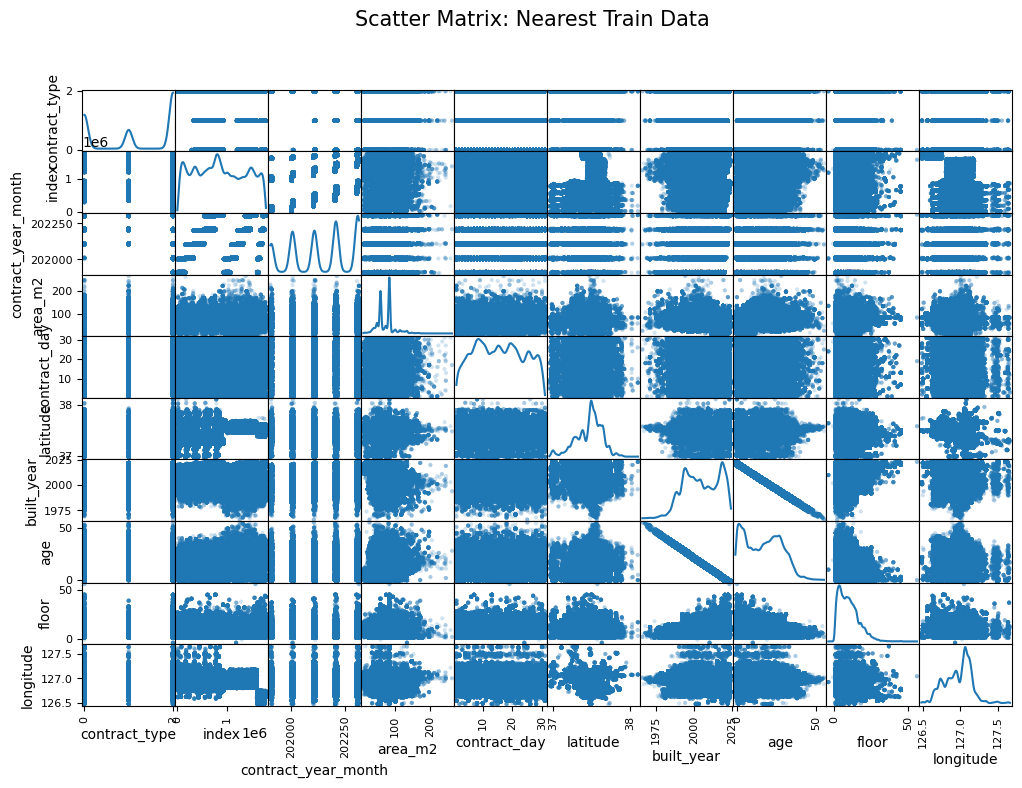

<Figure size 1200x800 with 0 Axes>

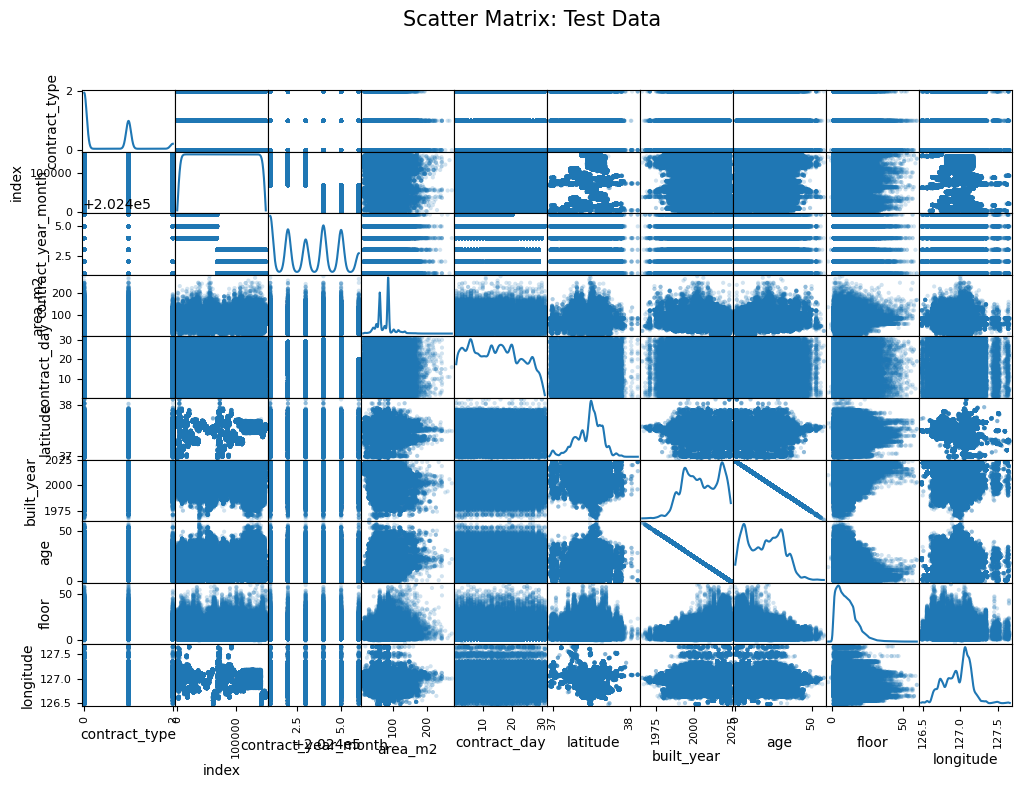

In [72]:
from pandas.plotting import scatter_matrix
nearest_train_df = tmp_train_df.iloc[tmp_test_df['nearest_place']]

# nearest_train_df에서 tmp_test_df와 같은 피처들만 선택
common_columns = list(set(tmp_test_df.columns) & set(nearest_train_df.columns))

# nearest_train_df와 tmp_test_df의 피처 분포 비교
plt.figure(figsize=(12, 8))
scatter_matrix(nearest_train_df[common_columns], alpha=0.2, figsize=(12, 8), diagonal='kde')
plt.suptitle('Scatter Matrix: Nearest Train Data', fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
scatter_matrix(tmp_test_df[common_columns], alpha=0.2, figsize=(12, 8), diagonal='kde')
plt.suptitle('Scatter Matrix: Test Data', fontsize=15)
plt.show()

In [73]:
print("상관계수 (Nearest Train Data):")
print(nearest_train_df[common_columns].drop(columns='_type').corr())

print("\n상관계수 (Test Data):")
print(tmp_test_df[common_columns].drop(columns='_type').corr())

상관계수 (Nearest Train Data):
                     contract_type     index  contract_year_month   area_m2  \
contract_type             1.000000 -0.259004            -0.646413  0.009451   
index                    -0.259004  1.000000             0.384239 -0.015423   
contract_year_month      -0.646413  0.384239             1.000000 -0.001151   
area_m2                   0.009451 -0.015423            -0.001151  1.000000   
contract_day              0.011966  0.027285            -0.030929  0.003138   
latitude                  0.014333  0.254864            -0.018939  0.005351   
built_year               -0.113369 -0.035241             0.142630  0.114225   
age                       0.036211  0.082098            -0.022429 -0.115557   
floor                    -0.029904 -0.018904             0.040224  0.097331   
longitude                -0.028692 -0.288070             0.048401  0.044161   

                     contract_day  latitude  built_year       age     floor  \
contract_type           

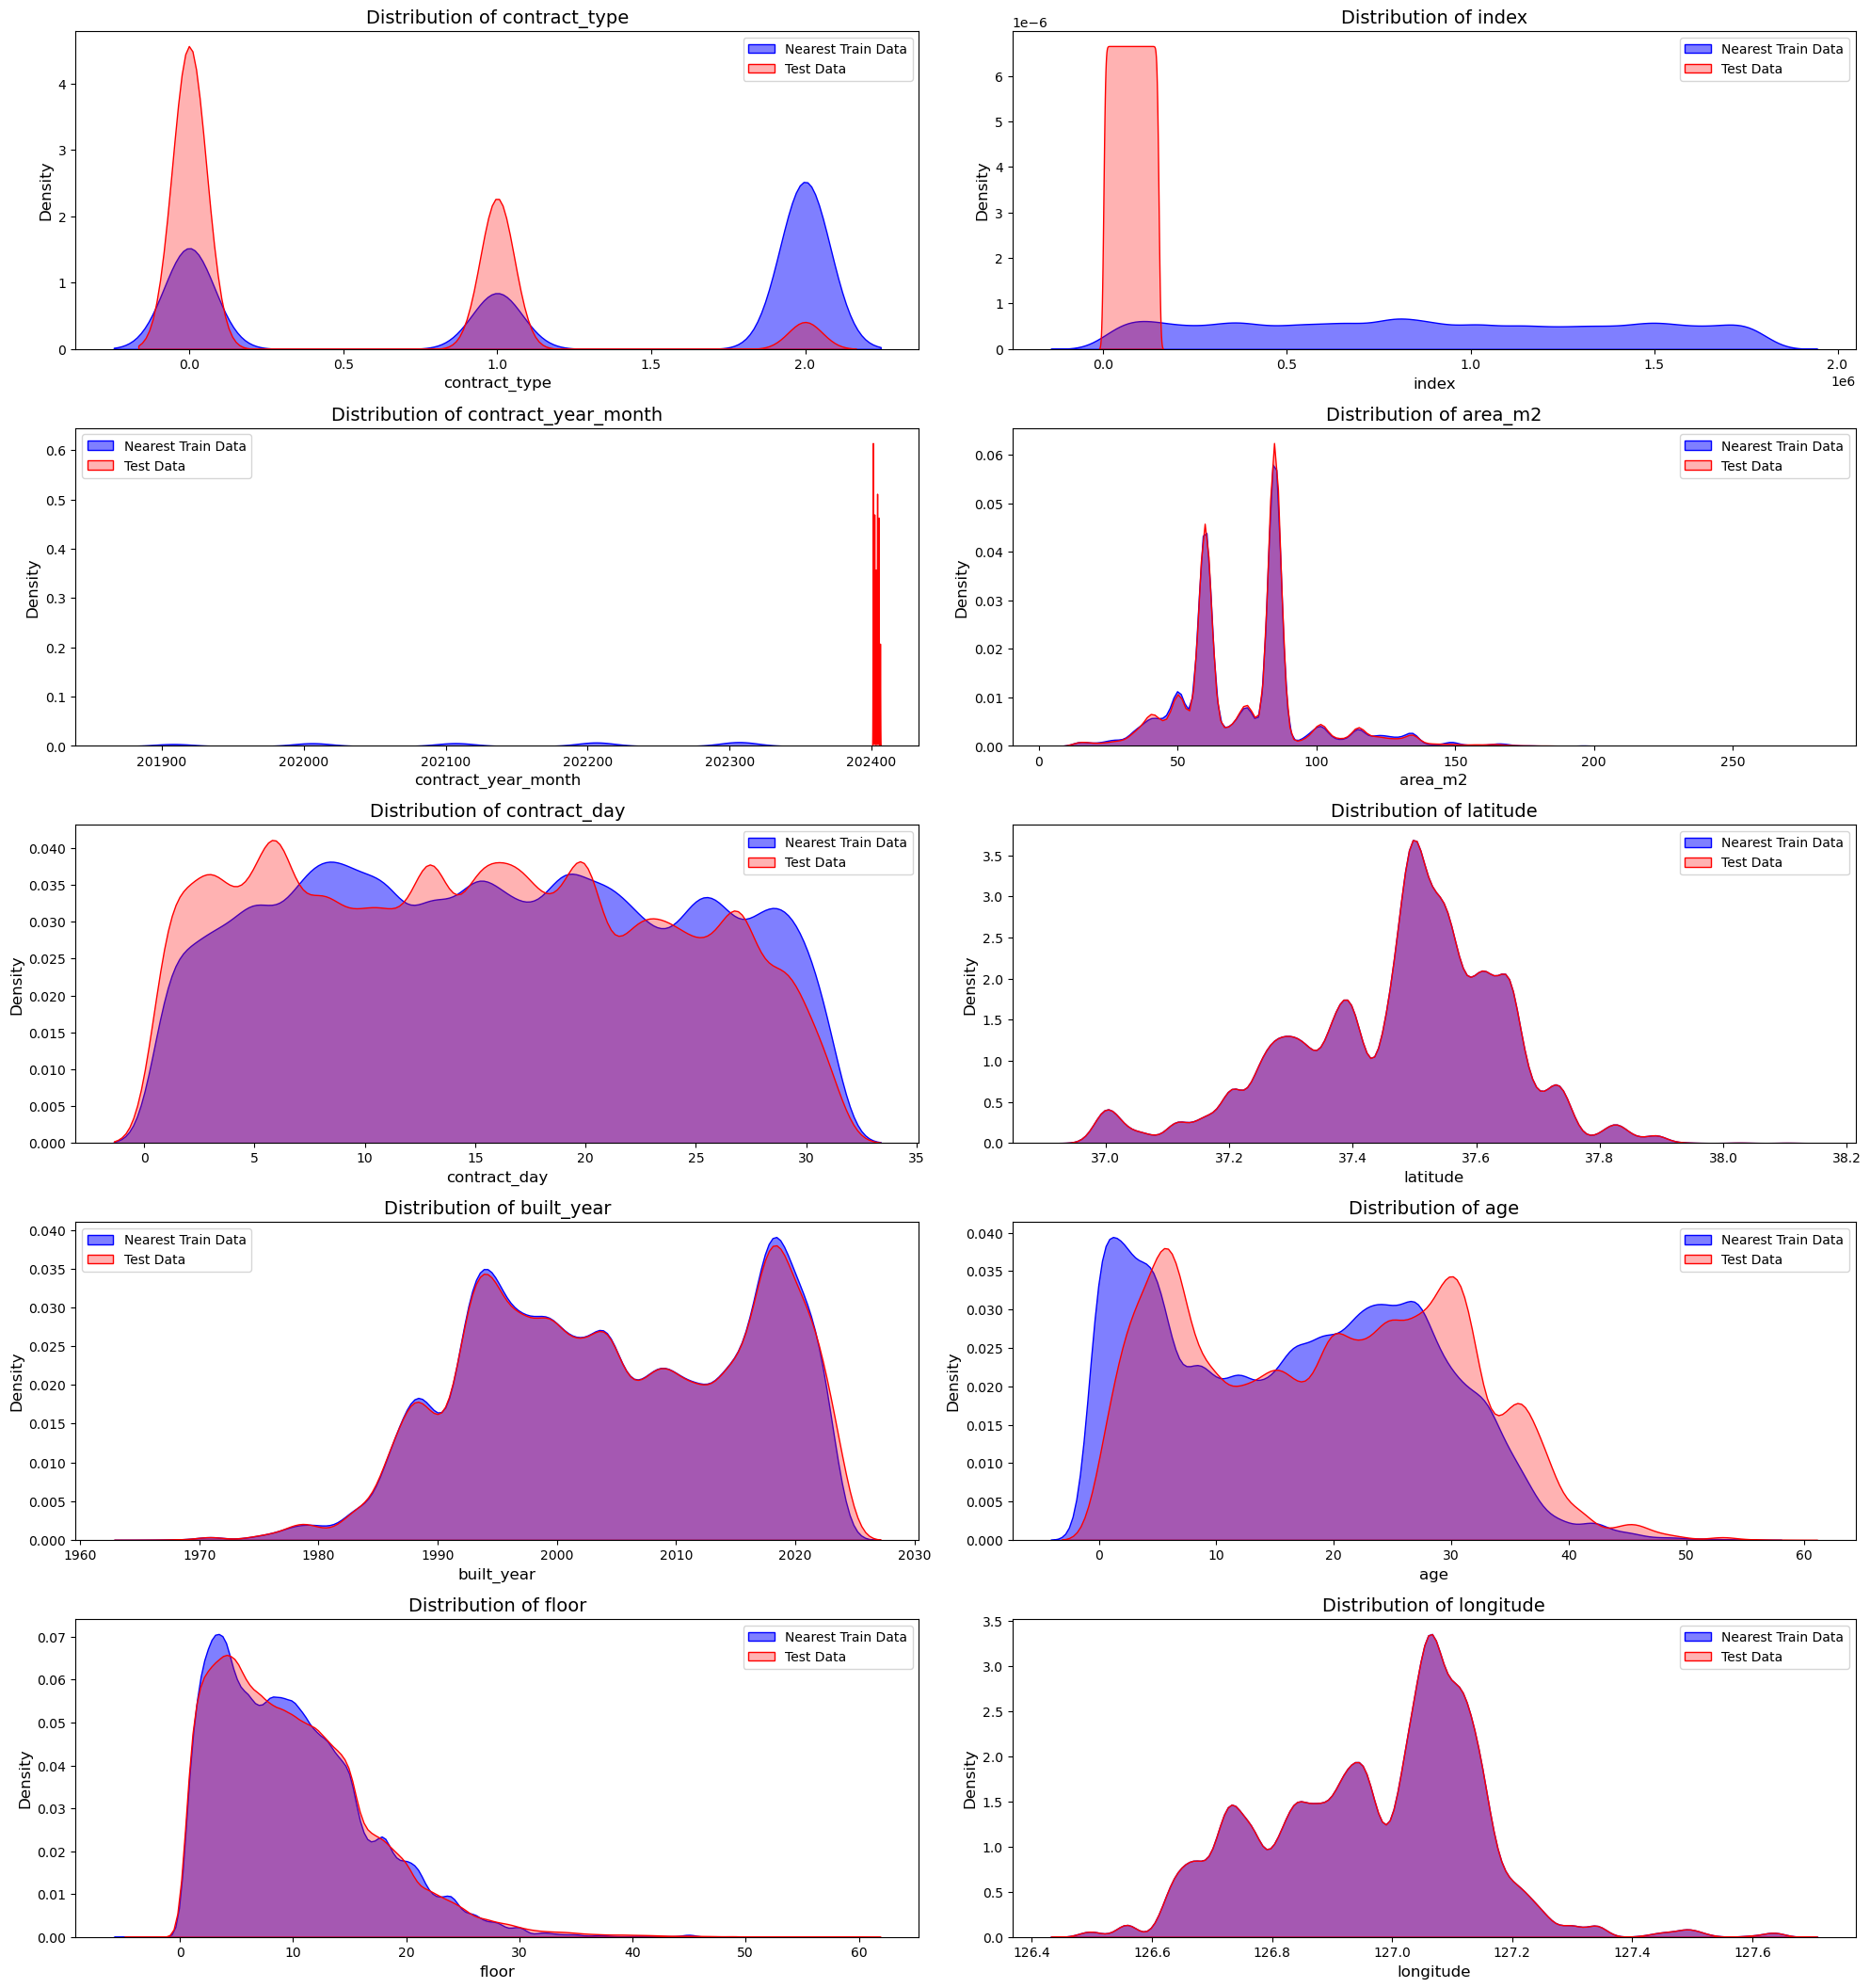

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# 공통된 피처들 리스트
common_columns = ['contract_type', 'index', 'contract_year_month', 'area_m2', 'contract_day', 'latitude', 'built_year', 'age', 'floor', 'longitude']

# 그래프 크기 설정
plt.figure(figsize=(20, 25))

# 피처마다 그래프를 그리기
for i, column in enumerate(common_columns, 1):
    plt.subplot(len(common_columns)//2 + 1, 2, i)
    
    # nearest_train_df와 tmp_test_df의 해당 피처에 대한 분포를 비교
    sns.kdeplot(nearest_train_df[column], label='Nearest Train Data', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(tmp_test_df[column], label='Test Data', fill=True, color='red', alpha=0.3)
    
    # 그래프 제목 및 라벨 설정
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()

# 레이아웃 정리
plt.tight_layout()
plt.show()

## AdaBoost 모델링

In [77]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [79]:
nearest_train_df.head()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type
46,46,84.9182,202003,26,2,2,2016,36.965423,127.048779,4,17000.0,train
162837,162837,50.3100,202012,15,2,1,1997,36.963105,127.040678,23,5000.0,train
774308,774308,46.9800,202311,7,2,3,1990,36.957089,127.047449,33,5500.0,train
774308,774308,46.9800,202311,7,2,3,1990,36.957089,127.047449,33,5500.0,train
774308,774308,46.9800,202311,7,2,3,1990,36.957089,127.047449,33,5500.0,train


In [84]:
columns_needed = ['area_m2', 'contract_year_month', 'contract_day', 'contract_type', 'floor', 'latitude', 'longitude',
                  'deposit']
columns_needed_test = ['area_m2', 'contract_year_month', 'contract_day', 'contract_type', 'floor', 'latitude', 'longitude']
train_data = nearest_train_df[columns_needed]
test_data = tmp_test_df[columns_needed_test]

In [85]:
holdout_start = 202307
holdout_end = 202312
holdout_data = train_data[
    (train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end)]
train_data = train_data[
    ~((train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end))]

In [86]:
X_train = train_data.drop(columns=['deposit'])
y_train = train_data['deposit']
X_holdout = holdout_data.drop(columns=['deposit'])
y_holdout = holdout_data['deposit']
X_test = test_data.copy()

In [111]:
base_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# AdaBoost 모델 생성
ada_model = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 훈련
ada_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [112]:
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_holdout)

print('Train MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Test MAE: ', mean_absolute_error(y_holdout, y_test_pred))

Train MAE:  10150.60057333706
Test MAE:  11241.976177737912


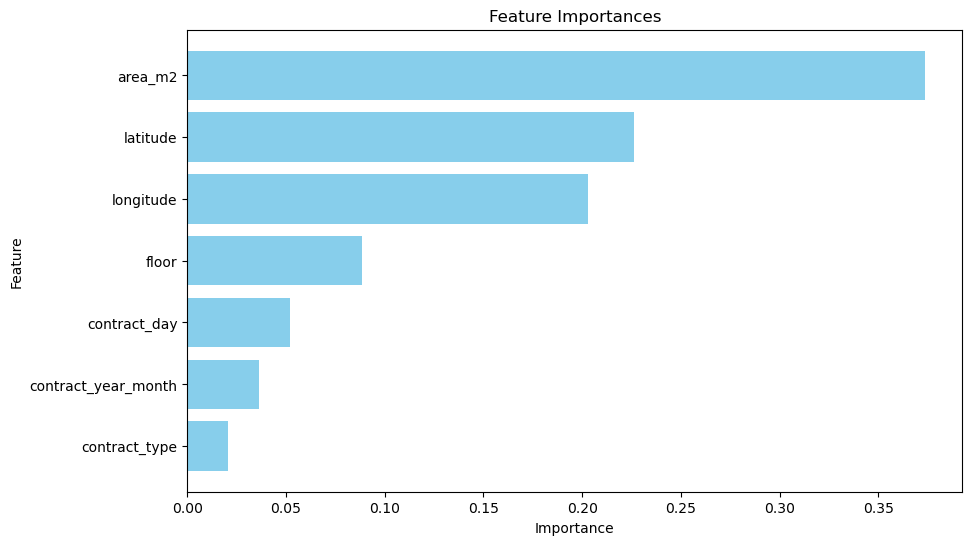

In [113]:
import matplotlib.pyplot as plt

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 정렬하기 위해 y축 반전
plt.show()


## 중복되지 않은 장소 데이터와 최근방 test 데이터의 피처별 분포 확인

In [125]:
different_lat_lon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 51 to 145311
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   area_m2              1221 non-null   float64       
 1   contract_year_month  1221 non-null   datetime64[ns]
 2   contract_day         1221 non-null   int64         
 3   contract_type        1221 non-null   int64         
 4   floor                1221 non-null   int64         
 5   built_year           1221 non-null   int64         
 6   latitude             1221 non-null   float64       
 7   longitude            1221 non-null   float64       
 8   age                  1221 non-null   int64         
 9   deposit              1143 non-null   float64       
 10  _type                1221 non-null   object        
 11  apt_idx              1221 non-null   int64         
 12  area                 1221 non-null   float64       
 13  area_price           1143 non-null 

In [124]:
tmp_test_df[tmp_test_df['nearest_place'].isin(different_lat_lon_df.index)]

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,_type,nearest_place,nearest_distance
2725,2725,67.5283,202404,22,0,3,2024,37.101009,126.905443,0,test,175494,0.893583
2753,2753,84.9892,202405,11,0,23,2024,37.101009,126.905443,0,test,175494,0.893583
2758,2758,84.9892,202405,15,0,7,2024,37.101009,126.905443,0,test,175494,0.893583
2776,2776,61.1536,202406,6,0,1,2024,37.101009,126.905443,0,test,175494,0.893583
2785,2785,101.9972,202406,17,0,7,2024,37.101009,126.905443,0,test,175494,0.893583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123727,123727,69.2000,202402,23,0,2,2007,37.616177,126.910023,17,test,1136108,0.023884
126820,126820,49.0100,202402,23,0,4,2023,37.475057,126.970368,1,test,1561586,0.020440
129374,129374,60.4800,202401,29,0,3,2000,37.504313,126.951887,24,test,1108605,0.138598
129385,129385,60.4800,202401,29,0,3,2000,37.504313,126.951887,24,test,1108605,0.138598


In [127]:
different_lat_lon_df.groupby(['latitude', 'longitude']).size()

latitude   longitude 
36.961815  127.058042    1
36.984672  126.928584    1
36.986613  126.924606    1
36.986677  126.927986    1
36.986760  127.104380    1
                        ..
37.954803  127.321710    1
38.024669  127.072245    1
38.026199  127.067297    1
38.031068  127.067807    1
38.181937  127.105145    1
Length: 1221, dtype: int64